In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

#np.random.seed(42)

### 载入数据

In [3]:
# 数据文件路径
data_path = '基金数据归一化.xlsx'
all_data = pd.read_excel(data_path, sheet_name = None)
# ['财通精选', '精准医疗', '国金鑫新']
data_key = '精准医疗'  
input_data = all_data[data_key]
x_len = int(input_data.shape[1])
x = input_data.iloc[:, range(1, x_len)]
y = input_data.iloc[:, [0]]

In [4]:
##数据归一化
x_MinMax = preprocessing.MinMaxScaler()
y_MinMax = preprocessing.MinMaxScaler()
y = np.array(y).reshape(len(y),1)
x = x_MinMax.fit_transform(x)
y = y_MinMax.fit_transform(y)
y = y.ravel()

### 参数设置

In [5]:
# 测试集占所有数据的比例
test_size = 0.2
# 隐层层数
#hidden_layer_sizes = 100
# 最大迭代次数
#max_iter = 200
# 初始学习率
#learning_rate_init = 0.001
# 设置gridsearch的参数

gridsearch_parameters = {'hidden_layer_sizes': [30,50,100,200,300],
                     'max_iter': [100,200,300,400,500],'learning_rate_init':[0.001,0.01,0.1],'activation' :[ 'relu','tanh','sigmoid'],
                    'solver': ['adam'],'alpha' :[0.01]
    }


#设置模型评估的方法.定义为负向mse，因为gridsearchcv是求目标最大化，所以通过负的mse求最小mse
score = 'neg_mean_squared_error'


### 划分数据集

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)

### 网格搜索交叉验证获取最优参数

In [7]:
#定义cv函数，10折交叉验证
def model_searchcv(x_train, y_train,model,params,score):
    #输入模型网格搜索
    clf = GridSearchCV(model, params, cv=10,
                       scoring=score)
    clf.fit(x_train, y_train)
    print('参数的最佳取值：{0}'.format(clf.best_params_))
    print('最佳模型得分:{0}'.format(-clf.best_score_))
    return clf.best_params_

In [8]:
#定义模型并且网格搜索
model=MLPRegressor()
best_params=model_searchcv(x_train,y_train,model,gridsearch_parameters,score)

参数的最佳取值：{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 300, 'learning_rate_init': 0.01, 'max_iter': 400, 'solver': 'adam'}
最佳模型得分:0.007879104136434346


### 构建模型并预测

In [14]:
# 构建模型
model = MLPRegressor(**best_params)
#        hidden_layer_sizes = hidden_layer_sizes, activation = 'relu',solver = 'adam',
#        alpha = 0.01, max_iter = max_iter)
# 训练模型
model.fit(x_train, y_train)
# 预测
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

### 结果分析

In [15]:
# mse
mse_train = mean_squared_error(pred_train, y_train)
mse_test = mean_squared_error(pred_test, y_test)
print("Train MSE = %f"%mse_train)
print("Test MSE = %f"%mse_test)

Train MSE = 0.003154
Test MSE = 0.009858


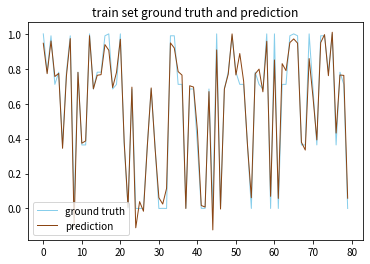

In [16]:
# 训练集
xx_train = range(0, len(y_train))
plt.figure()
plt.title('train set ground truth and prediction')
plt.plot(xx_train, y_train, color="skyblue", label="ground truth", linewidth=1) 
plt.plot(xx_train, pred_train, color="saddlebrown", label="prediction", linewidth=1)
plt.legend(loc = 'lower left')
plt.show()

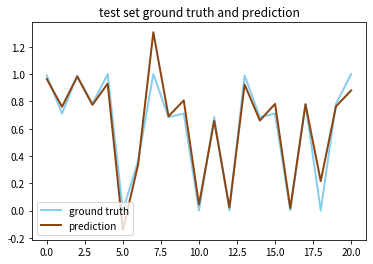

In [17]:
# 测试集
xx_test = range(0, len(y_test))
plt.figure()
plt.title('test set ground truth and prediction')
plt.plot(xx_test, y_test, color='skyblue', label='ground truth', linewidth=2) 
plt.plot(xx_test, pred_test, color='saddlebrown', label='prediction', linewidth=2)
plt.legend(loc = 'lower left')
plt.show()